### importing liberaries

In [5]:
import pandas as pd
import nltk

### reading data

In [3]:
data = pd.read_csv("C:\\Users\\EMZ\\Desktop\\JeelAIDM\\NLP\\dataset2_2.csv")

In [4]:
data.head(3)

,sentiment,tweet
0,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ..."
1,neutral,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة..."
2,neutral,"""@Alito_NBA اتوقع انه بيستمر"""


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10548 entries, 0 to 10547
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10547 non-null  object
 1   tweet      10547 non-null  object
dtypes: object(2)
memory usage: 164.9+ KB


In [7]:
data["sentiment"].value_counts()

neutral     5340
negative    3529
positive    1678
Name: sentiment, dtype: int64

In [9]:
data["sentiment"].unique() 

array(['negative', 'neutral', 'positive', nan], dtype=object)

In [10]:
data["sentiment"].nunique() 

3

<AxesSubplot:ylabel='sentiment'>

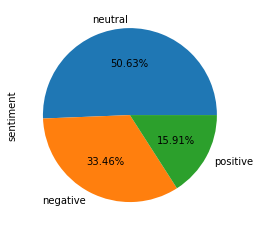

In [11]:
data['sentiment'].value_counts().plot.pie(autopct='%1.2f%%')

#### preprocessing

In [8]:
import re

In [12]:
def clean_txt(text):
    return re.sub('[^ ء-ي ]', ' ', str(text))

In [15]:
data['clean_tweet'] = data['tweet'].apply(clean_txt)

In [16]:
data.sample(2)

,sentiment,tweet,clean_tweet
8962,neutral,"""#اليمنية| #بسمة وطن يفوز على #النسور بسداسية ...",اليمنية بسمة وطن يفوز على النسور بسداسية ...
7982,negative,"""RT @abu_sulttan1: سيسي وتبقى يالخمامه سيسيو ق...",سيسي وتبقى يالخمامه سيسيو ق...


In [20]:
#!pip install Tashaphyne


In [21]:
import tashaphyne.arabic_const as arabconst

In [ ]:
#arabconst.normalize_spellerrors(text)

In [22]:
! pip install PyArabic

In [27]:
import pyarabic.araby as araby

In [25]:
#strip_harakat(text) #حذف الحركات كلها ماعدا الشدة
#strip_tatweel(text)

In [30]:
#data['strip_harakat'] = data['clean_tweet'].apply(araby.strip_tatweel)

In [44]:
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("ى" ,"ي" , text) # also try endswith
    
    return text.strip()

In [50]:
data['strip_harakat'] = data['clean_tweet'].apply(normalizeArabic)

In [53]:
data['strip_harakat'] = data['strip_harakat'].apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x))

In [62]:
data.sample(10)

,sentiment,tweet,clean_tweet,strip_harakat
810,neutral,"""برشلونة رفض التخلي عن توران مقابل مبلغ كبير م...",برشلونة رفض التخلي عن توران مقابل مبلغ كبير م...,برشلونه رفض التخلي عن توران مقابل مبلغ كبير من...
7126,negative,"""الإتحاد الأوربي قوي إقتصاديا ضعيف عسكريا مقار...",الإتحاد الأوربي قوي إقتصاديا ضعيف عسكريا مقار...,الاتحاد الاوربي قوي اقتصاديا ضعيف عسكريا مقارن...
5717,neutral,"""مداهمات واسعة لمخيمات #النازحين #السوريين في ...",مداهمات واسعة لمخيمات النازحين السوريين في ...,مداهمات واسعه لمخيمات النازحين السوريين في ...
7890,negative,"""أظن أن الذي قتل الشهيد جبران تويني معروف وواض...",أظن أن الذي قتل الشهيد جبران تويني معروف وواض...,اظن ان الذي قتل الشهيد جبران تويني معروف وواضح...
5284,neutral,"""RT @ScreenMixx: والد انجلينا جولي ينتقد تصريح...",والد انجلينا جولي ينتقد تصريح...,والد انجلينا جولي ينتقد تصريح روبرت دي نيرو عن...
7830,positive,"""🔹الثقافة القرآنية🔘 الله يريد منا أن يكون محمد...",الثقافة القرآنية الله يريد منا أن يكون محمد...,الثقافه القرانيه الله يريد منا ان يكون محمد ح...
7091,negative,"""جان أوغاسبيان ، وزير الدولة لشؤون (المرأة) رج...",جان أوغاسبيان وزير الدولة لشؤون المرأة رج...,جان اوغاسبيان وزير الدوله لشؤون المراه رج ل...
8574,positive,"""محمد الذهلي:ثقافه تنفع القريه ورزانه يعني بإخ...",محمد الذهلي ثقافه تنفع القريه ورزانه يعني بإخ...,محمد الذهلي ثقافه تنفع القريه ورزانه يعني باخت...
6933,positive,"""RT @WBedaiwi: #صيام_تاسوعاء_وعاشوراء قال رسو...",صيام تاسوعاء وعاشوراء قال رسو...,صيام تاسوعاء وعاشوراء قال رسول الله افضل ال...
6531,negative,بحسب الجزيرة ميدان التحرير يتسع ل 500 ألف مصري...,بحسب الجزيرة ميدان التحرير يتسع ل ألف مصري...,بحسب الجزيره ميدان التحرير يتسع ل الف مصري او...


#### tokenization

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EMZ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [63]:
from nltk.tokenize import word_tokenize
tokens = []
for index, row in data.iterrows():
    tokens.append(word_tokenize(row["strip_harakat"]))
data["tokenize"]= tokens

In [75]:
data["w_count"]= data["strip_harakat"].apply(lambda x: len(str(x).split()))

In [77]:
data["w_count2"]= data["tokenize"].apply(lambda x: len(x))

In [78]:
data.head(2)

,sentiment,tweet,clean_tweet,strip_harakat,tokenize,w_count,w_count2
0,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...",نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...,نصيحه ما عمرك اتنزل لعبه سوبر ماريو مش زي ما ك...,"[نصيحه, ما, عمرك, اتنزل, لعبه, سوبر, ماريو, مش...",18,18
1,neutral,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة...",نادين نسيب نجيم مجلة ماري كلير ملكة...,نادين نسيب نجيم مجله ماري كلير ملكه الصحراء,"[نادين, نسيب, نجيم, مجله, ماري, كلير, ملكه, ال...",8,8


#### remove stop words

In [79]:
from nltk.corpus import stopwords

In [80]:
sw = stopwords.words("arabic")

In [81]:
len(sw)

754

In [96]:
def remove_stopwords(text):
    sw_removed = [word for word in text if not word  in sw]
    return sw_removed
    

In [98]:
data["remove_sw"]= data["tokenize"].apply(remove_stopwords)

In [91]:
data["remove_sw"]= data["clean_tweet"].apply(lambda x: remove_stopwords(x))

TypeError: argument of type 'WordListCorpusReader' is not iterable

In [99]:
data["remove_sw2"]= data["clean_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

In [100]:
data.head(2)

,sentiment,tweet,clean_tweet,strip_harakat,tokenize,w_count,w_count2,remove_sw,remove_sw2
0,negative,"""نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...",نصيحه ما عمرك اتنزل لعبة سوبر ماريو مش زي ما ...,نصيحه ما عمرك اتنزل لعبه سوبر ماريو مش زي ما ك...,"[نصيحه, ما, عمرك, اتنزل, لعبه, سوبر, ماريو, مش...",18,18,"[نصيحه, عمرك, اتنزل, لعبه, سوبر, ماريو, مش, زي...",نصيحه عمرك اتنزل لعبة سوبر ماريو مش زي متوقعين...
1,neutral,"""#نادين_نسيب_نجيم ❤️❤️❤️مجلة #ماري_كلير 💭#ملكة...",نادين نسيب نجيم مجلة ماري كلير ملكة...,نادين نسيب نجيم مجله ماري كلير ملكه الصحراء,"[نادين, نسيب, نجيم, مجله, ماري, كلير, ملكه, ال...",8,8,"[نادين, نسيب, نجيم, مجله, ماري, كلير, ملكه, ال...",نادين نسيب نجيم مجلة ماري كلير ملكة الصحراء


In [101]:
!pip install ar_wordcloud

     ------------------------------------ 153.1/153.1 kB 652.2 kB/s eta 0:00:00


In [102]:
import matplotlib.pyplot as plt
from ar_wordcloud import ArabicWordCloud
word_cloud = ArabicWordCloud(background_color="white")
plt.figure(figsize=(15,15))
new_cloud = word_cloud.from_text(u' '.join(data["remove_sw2"]))

downloading and unzipping arabic font: C:\Users\EMZ\anaconda3\lib\site-packages\ar_wordcloud\fonts\NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: C:\Users\EMZ\anaconda3\lib\site-packages\ar_wordcloud\fonts\NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: C:\Users\EMZ\anaconda3\lib\site-packages\ar_wordcloud\fonts\NotoKufiArabic-unhinted.zip .. 


AssertionError: بالله أتأكد ان اسم الخط المُدخل صحيح
Please make sure the selected font name is correct!

In [103]:
word_cloud = ArabicWordCloud()
plt.figure(figsize=(15,15))
new_cloud2 = word_cloud.from_text(u' '.join(data["remove_sw2"]))   

AssertionError: بالله أتأكد ان اسم الخط المُدخل صحيح
Please make sure the selected font name is correct!

In [104]:
from ar_wordcloud import ArabicWordCloud

In [106]:
word_cloud = ArabicWordCloud(background_color = "white")
plt.figure(figsize=(15,15))

AssertionError: بالله أتأكد ان اسم الخط المُدخل صحيح
Please make sure the selected font name is correct!

### Stemming and lemmatization

In [107]:
#!pip install farasapy

In [118]:
from farasa.stemmer import FarasaStemmer
f_ar_stemmer = FarasaStemmer()

C:\Users\EMZ\anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'farasa-api.qcri.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


100%|██████████| 241M/241M [04:58<00:00, 808kiB/s] 


In [121]:
print(f_ar_stemmer.stem("نصيحة"))

نصيحة


In [122]:
print(f_ar_stemmer.stem("نصيحه"))

نصيح


In [108]:
!pip install camel-tools

  Using cached camel_tools-1.4.1-py3-none-any.whl (114 kB)


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [11 lines of output]
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  running bdist_wheel
  running build
  running build_ext
  building 'kenlm' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for camel-kenlm
  error: subprocess-exited-with-error
  
  Running setup.py install for camel-kenlm did not run successfully.
  exit code: 1
  
  [13 lines of output]
  'bash' is not rec

  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached camel-kenlm-2021.12.27.tar.gz (418 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 216.6/216.6 kB 440.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for camel-kenlm
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=13c28246b8738117147bec95f366abe2225ebd7e1a47359dd9a7292875dabced
  Stored in directory: c:\users\emz\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=5893463be3b44ff32083016efd6127d4b59231ffed3cb8c0c85c983b40ec7293
  Stored in directory: c:\users\emz\appdata\lo

  running build_ext
  building 'kenlm' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: legacy-install-failure

Encountered error while trying to install package.

camel-kenlm

note: This is an issue with the package mentioned above, not pip.
hint: See above for output from the failure.


In [109]:
pip install camel-tools

  Using cached camel_tools-1.4.1-py3-none-any.whl (114 kB)
  Using cached emoji-2.1.0-py3-none-any.whl
  Using cached editdistance-0.6.0-cp39-cp39-win_amd64.whl (24 kB)
  Using cached camel-kenlm-2021.12.27.tar.gz (418 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: regex!=2019.12.17 in c:\users\emz\anaconda3\lib\site-packages (from transformers>=3.0.2->camel-tools) (2022.3.15)



  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [11 lines of output]
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  running bdist_wheel
  running build
  running build_ext
  building 'kenlm' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for camel-kenlm
  error: subprocess-exited-with-error
  
  Running setup.py install for camel-kenlm did not run successfully.
  exit code: 1
  
  [13 lines of output]
  'bash' is not rec

  Running setup.py clean for camel-kenlm
Failed to build camel-kenlm
  Running setup.py install for camel-kenlm: started
  Running setup.py install for camel-kenlm: finished with status 'error'


In [110]:
from nltk.stem import ISRIStemmer

In [111]:
ar_stem = ISRIStemmer()

In [112]:
print(ar_stem.stem("نصيحة"))

نصح


In [113]:
print(ar_stem.stem("نصيحه"))

نصح


In [114]:
from tashaphyne.stemming import ArabicLightStemmer

In [115]:
t_ar_stemmer = ArabicLightStemmer()

In [117]:
print(t_ar_stemmer.light_stem("نصيحه"))

صيح
